
### Responsibility matrix
$$
    R_{i,k} = S_{i,k} - \max_{k' \neq k} \left( S_{i,k'} + A_{i,k'} \right)
$$
where $s_{i,k}$ is the similarity between points $i$ and $k$ and $a_{i,k}$ is the availability of point $i$ to be exemplar of cluster $k$.

### Availability matrix
This have two cases:
1. If $i$ equals $k$:
$$
    A_{i,k} = \sum_{i' \neq k} \max \left( 0, R_{i',k} \right)
$$

2. If $i$ not equals $k$:
$$
    A_{i,k} = \min \left( 0, R_{k,k} + \sum_{i' \notin \{i,k\}} \max \left( 0, R_{i',k} \right) \right)
$$

### Final updation formula for responsibility and availability matrix (Damping Factor) :
Computing responsibilities and availabilities according to simple update rules will often lead to oscillations caused by ```overshooting``` the solution, so the responsibility and availability messages are ```damped``` by a factor $\lambda$ in each iteration. The damping factor $\lambda$ is used to avoid the oscillation of the algorithm. The algorithm will be more stable if we use a damping factor $\lambda$ between 0.5 and 1.0. The default value of $\lambda$ is 0.5.

$$
    A_{i,k}^{(curr)} = \lambda A_{i,k}^{(prev)} + (1-\lambda) A_{i,k}^{(curr')}
$$
$$
    R_{i,k}^{(curr)} = \lambda R_{i,k}^{(prev)} + (1-\lambda) R_{i,k}^{(curr')}
$$

Where,
1. $\lambda$ is the damping factor.
2. $A_{i,k}^{(prev)}$ is the availability of point $i$ to be exemplar of cluster $k$ in the previous iteration.
3. $R_{i,k}^{(prev)}$ is the responsibility of point $i$ to be exemplar of cluster $k$ in the previous iteration.
4. $A_{i,k}^{(curr)}$ is the availability of point $i$ to be exemplar of cluster $k$ in the current iteration.
5. $R_{i,k}^{(curr)}$ is the responsibility of point $i$ to be exemplar of cluster $k$ in the current iteration.
6. $A_{i,k}^{(curr')}$ is the availability of point $i$ to be exemplar of cluster $k$ in the current iteration according to the simple update rules.
7. $R_{i,k}^{(curr')}$ is the responsibility of point $i$ to be exemplar of cluster $k$ in the current iteration according to the simple update rules.


### Algorithm for Affinity Propagation Clustering (APC):
- Initialize $S_{i,k}$ to the similarity between points $i$ and $k$.
- Initialize $A_{i,k}$ and $R_{i,k}$ to 0.
- Repeat until convergence:
    - Update $A_{i,k}$ using the formula above.
    - Update $R_{i,k}$ using the formula above.
- Then we get a criterion matrix $R_{i,k} + A_{i,k}$, where the maximum value in each row is the exemplar of the cluster.
- The rows with same exemplar are in the same cluster.

### What is the best example that can show us ossilation of the algorithm?
The best example is when we have a dataset with only two points . In this case, the algorithm will oscillate between two clusters.

### Convergence:
The algorithm will converge when the number of clusters will not change anymore.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs
sns.set()


### n_samples
- Number of samples to generate
- Default: 100

### n_centers
- Number of centers to generate
- Default: 3

### cluster_std
- Standard deviation of the clusters
- Default: 1.0

### random_state
- Random number generator
- Default: None

### data
- Generated samples

### true_labels
- Label of the generated samples



### preference: 
- Preference for each point - points with larger values of preferences are more likely to be chosen as exemplars. The number of clusters is influenced by the input preferences value. If the preferences are not passed as arguments, they will be set to the median of the input similarities. i.e the preference is the median of the similarity matrix.
- If the preference is too high, then the algorithm will choose one point as the exemplar of the cluster and the other point will be the outlier.
- If the preference is too low, then the algorithm will choose both points as the exemplars of the cluster.

### damping:
- Damping factor between 0.5 and 1. Damping is used to avoid numerical oscillations when updating these messages. If not set, then damping is set to 0.5.
- Higher damping factor leads to faster convergence and less number of clusters, but it may not converge.
- Lower damping factor leads to slower convergence and more number of clusters, but it will converge.

### max_iter:
- Maximum number of iterations to perform before timing out. If not set, then max_iter is set to 200.

### convergence_iter:
- Number of iterations with no change in the number of estimated clusters that stops the convergence. If not set, then convergence_iter is set to 15 and if max_iter is set too then it is set to 10% of max_iter.

### Silhouette Coefficient
- Measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

### Diffrerent colmaps for coloring the clusters
- 5 clusters: rainbow, 
- 6 clusters: Set1, 
- 7 clusters: Set2, 
- 8 clusters: Set3, 
- 9 clusters: tab10, 
- 10 clusters: tab20



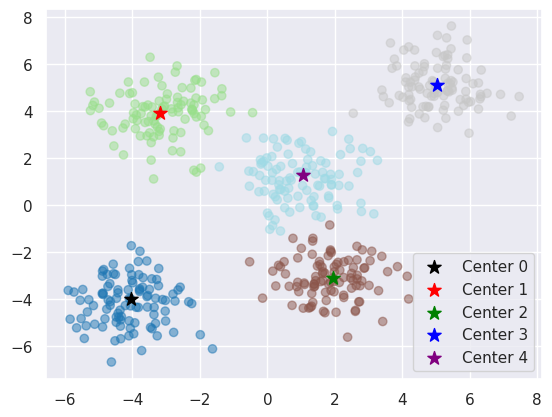

Number of clusters:  5
Silhouette Coefficient: 0.654
Correct labels: 499/500
Accuracy: 99.80%


In [4]:
# Clustering the data
model = AffinityPropagation(
    preference=-150, 
    damping=0.6, 
    max_iter=200, 
    convergence_iter=15
)  

# Fitting the model
model.fit(data)

# Plotting the clusters
plt.scatter(data[:, 0], data[:, 1], c=model.labels_, cmap='tab20', alpha=0.5)

# Plotting the centers
for i in range(len(model.cluster_centers_)):
    plt.scatter(model.cluster_centers_[i][0], model.cluster_centers_[i][1], color=colors[i], marker='*', s=100,label='Center {}'.format(i))
    
plt.legend()
plt.show()

print("Number of clusters: ", len(model.cluster_centers_))

# Evaluating the model
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data, model.labels_))    
  
# How many labels are correct?
model_labels = [3,2,1,4,0]

def get_label(label):
    return model_labels[label]

count = 0

for i in range(len(true_labels)):
    if get_label( model.labels_[i]) == true_labels[i]:
        count += 1

print("Correct labels: {}/{}".format(count, len(true_labels)))
print("Accuracy: {:.2f}%".format(count/len(true_labels)*100))


### Measuring the damping effect on the number of clusters

<AxesSubplot: title={'center': 'Damping vs Clusters'}, xlabel='Damping', ylabel='Clusters'>

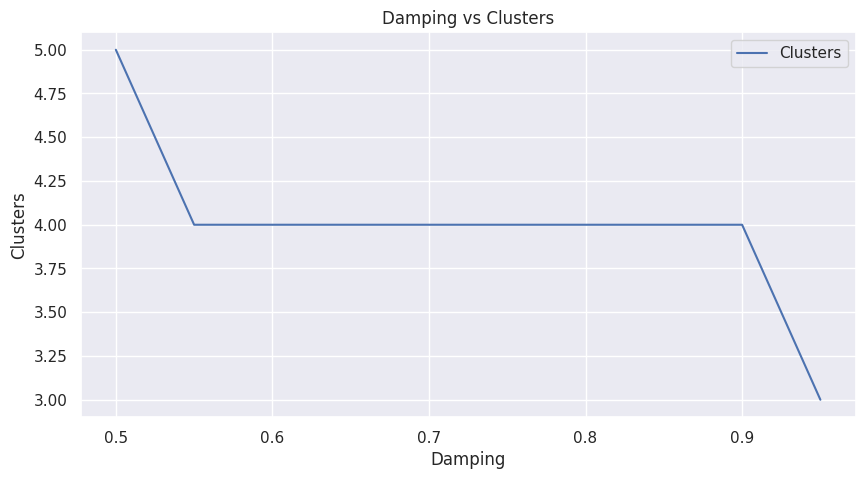

In [5]:
df = pd.read_csv('Iris.csv')

data = df.iloc[:, 1:5].values

mapping = []

for i in range(50, 100, 5):
    model = AffinityPropagation(
        preference=-16,         
        damping=i/100,
        max_iter=300,
        convergence_iter=15
    )
    model.fit(data)
    mapping.append([i/100, len(model.cluster_centers_)])
    
df = pd.DataFrame(mapping, columns=['Damping', 'Clusters'])
df.plot(x='Damping', y='Clusters', kind='line', figsize=(10, 5), title='Damping vs Clusters', xlabel='Damping', ylabel='Clusters')
